# Minicurso Recomendação - SE/UFRJ

Este notebook contém um exemplo prático de recomendação de filmes utilizando o dataset _Movie Lens 100k_. As recomendações são realizadas utilizando a biblioteca _CaseRecommender_. 

## Imports

In [1]:
from caserec.recommenders.rating_prediction.itemknn import ItemKNN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

## Carregando Dados

Os dados estão contidos na pasta `./dataset/ml-100k` e os arquivos a serem utilizados é o `u.data`, que contém informações do ID do usuário, ID do item e a nota que o usuário deu ao item. 

Além disso, o arquivo `u.info` é utilizado para extrair as informações do filme (Título e ID).

In [2]:
df_ratings = pd.read_csv('./dataset/ml-100k/u.data', sep='\t') # Carrega arquivo com dados
df_ratings.columns = ['user', 'item', 'feedback_value', 'timestamp'] # Inserindo nome das colunas
df_ratings.drop(['timestamp'], axis=1, inplace=True) # Retirando coluna de timestamp
df_ratings.head()

,user,item,feedback_value
0,186,302,3
1,22,377,1
2,244,51,2
3,166,346,1
4,298,474,4


In [3]:
df_info = pd.read_csv('./dataset/ml-100k/u.item', sep='|', encoding = "ISO-8859-1", header=None) # Carrega arquivo com dados
df_info = df_info[[0, 1]].copy()
df_info.columns = ['item', 'title']
df_info.head()

,item,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


## Separando dados em treinamento e teste

In [4]:
train_file, test_file = './outputs/train_file.dat', './outputs/test_file.dat' 
# Salvando dados em arquivo
df_train, df_test = train_test_split(df_ratings, test_size=0.3) 
# Salvando dados em arquivo
df_train.to_csv(train_file, sep=' ', index=None, header=None) 
df_test.to_csv(test_file, sep=' ', index=None, header=None)

## Treinando modelo

Treinaremos o modelo ItemKNN que agrupa os itens através de uma distância de similaridade a partir das notas que os usuários deram. 

In [5]:
predictions_output_filepath = './outputs/predictions.dat'
model = ItemKNN(train_file=train_file, 
                test_file=test_file, 
                k_neighbors=30, 
                sep=' ', 
                output_file = predictions_output_filepath)

In [6]:
%%time
model.compute(verbose=True)

[Case Recommender: Rating Prediction > ItemKNN Algorithm]

train data:: 943 users and 1631 items (69999 interactions) | sparsity:: 95.45%
test data:: 942 users and 1486 items (30000 interactions) | sparsity:: 97.86%

training_time:: 4.674755 sec
prediction_time:: 12.142514 sec
Eval:: MAE: 0.798441 RMSE: 1.037261 
CPU times: user 24.8 s, sys: 295 ms, total: 25.1 s
Wall time: 25.2 s


\begin{equation*}
    MAE = \frac{1}{N} \sum_{i = 0}^{N} |y-\hat{y}|
\end{equation*} 

\begin{equation*}
    RMSE = \sqrt{\sum_{i = 0}^{N} \frac{1}{N} (y-\hat{y})^2}
\end{equation*}
onde $y$ é a nota original, $\hat{y}$ é o valor previsto e $N$ é o número de notas não nulas no conjunto de dados inicial. 

In [7]:
model.matrix

array([[5., 3., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

## Visualização da Esparsidade dos Dados

(Text(0.5, 1.05, 'Sparsity'), Text(0, 0.5, 'Items'), Text(0.5, 0, 'Users'))

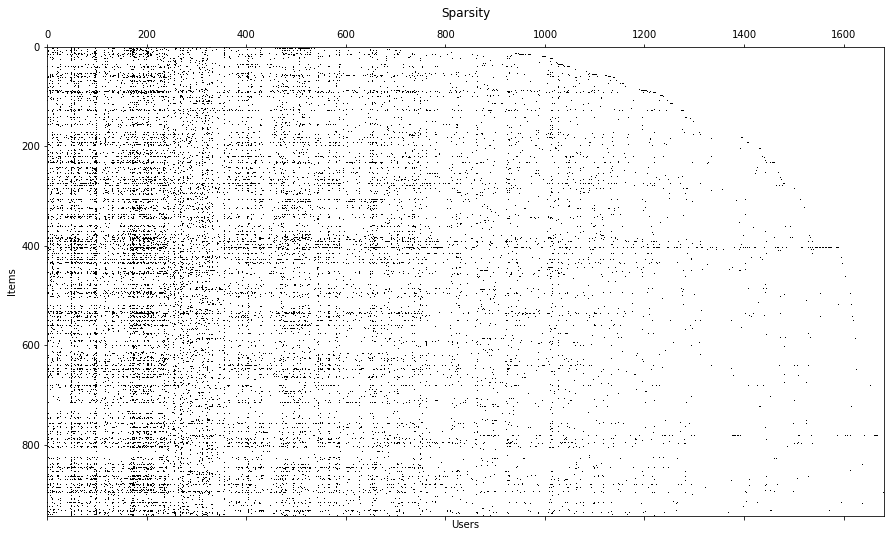

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
ax.spy(model.matrix)
ax.set_title('Sparsity'), ax.set_ylabel('Items'), ax.set_xlabel('Users')

## Prevendo notas

In [9]:
df_predictions = pd.DataFrame(model.predictions, columns=['user', 'item', 'rating'])
df_predictions.head()

,user,item,rating
0,1,5,3.260928
1,1,19,4.720639
2,1,20,3.674831
3,1,24,2.878235
4,1,30,4.159861


## Associando ID com Título

In [10]:
df_final = df_predictions.join(df_info, on='item', rsuffix='r').drop(['itemr'], axis=1)
df_final.head()

,user,item,rating,title
0,1,5,3.260928,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
1,1,19,4.720639,Angels and Insects (1995)
2,1,20,3.674831,Muppet Treasure Island (1996)
3,1,24,2.878235,"Birdcage, The (1996)"
4,1,30,4.159861,Crimson Tide (1995)


## Criando lista de recomendações Top-N

In [11]:
user = 21
top_n = 10
df_final[df_final.user == user].sort_values(['rating'], ascending=False).head(top_n)

,user,item,rating,title
941,21,100,4.563922,Heavy Metal (1981)
947,21,200,4.287611,Evil Dead II (1987)
967,21,448,4.171294,Star Trek: The Motion Picture (1979)
938,21,7,4.017935,Babe (1995)
945,21,164,3.994521,Jean de Florette (1986)
966,21,443,3.957748,"Blob, The (1958)"
979,21,670,3.955631,Bride of Frankenstein (1935)
946,21,184,3.878137,Psycho (1960)
976,21,635,3.833114,Escape from New York (1981)
974,21,567,3.714329,Speed (1994)
